# Edges detection

Les contours (_edges_) dans une image sont les zones qui délimitent les objets observés.
Détecter des contours est donc utile pour identifier les objets dans une image, ce qui peut permettre par exemple de mesurer leur taille.


```{figure} figs/edge-example.png
---
width: 250px
name: F:feature:edges:example
```

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from myst_nb import glue

## Intérêt de la dérivée

Les contours sont caractérisés par une variation rapide de l'intensité des pixels.
La {numref}`F:feature:edges:profile` représente le profil de luminosité selon une ligne horizontale dans l'image.
On voit clairement que le contour du chapeau se caractérise par une croissante brutale de la luminosité des pixels.

```{glue:figure} G:feature:edges:profile
:name: "F:feature:edges:profile"
```

En conséquence, la dérivée est un outil efficace pour mettre en évidence les contours d'une image.
la présence d'un contour peut être détectée en analysant l'amplitude de la dérivée 1<sup>re</sup>
du profil d'intensité perpendiculairement au contour.
On peut également détecter un contour en déterminant le passage à zéro de la dérivée 2<sup>e</sup>.

```{figure} figs/derivatives.png
---
width: 100%
name: F:feature:edges:derivatives
---
De gauche à droite : une image simple, son profil de luminosité suivant l'axe horizontal,
la dérivée 1<sup>re</sup> et la dérivée 2<sup>e</sup>.
```

Comme une image dépend de deux dimensions, les dérivées sont à calculer selon les deux axes.
Par exemple, la dérivée 1<sup>re</sup> d'une image est constituée des termes
$\frac{\partial f(x,y)}{\partial x}$ et $\frac{\partial f(x,y)}{\partial y}$.
Comme en plus une image est numérique, les dérivées sont calculées à l'aide des différences discrètes.
Par exemple :

$$
\frac{\partial f(x,y)}{\partial x} = f(x+1,y) - f(x,y).
$$

Ainsi, en notant $f$ l'image :

<!-- (image représentant le gradient, GW p.729) -->

* la dérivée 1<sup>re</sup>, appelée « gradient » est définie par :
  
  $$
  \nabla f =
  \begin{pmatrix}
    f(x+1,y) - f(x,y) \\ f(x,y+1) - f(x,y)
  \end{pmatrix}
  $$


* la dérivée 2<sup>e</sup>, appelée « laplacien » est définie par :
  
  $$
  \Delta f =
  \begin{pmatrix}
    f(x+1,y) - 2f(x,y) + f(x-1,y) \\ f(x,y+1) - 2f(x,y) + f(x,y-1)
  \end{pmatrix}
  $$

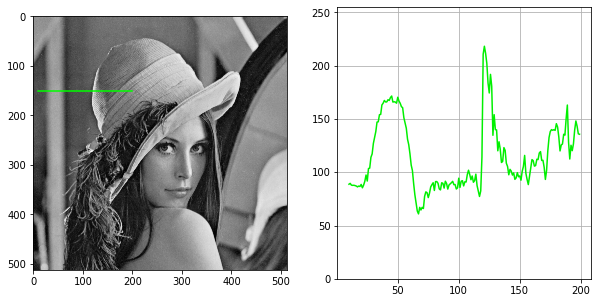

In [4]:
img = io.imread("figs/lena.tiff")
img = rgb2gray(img) * 255
x1, x2 = 10, 200
y = 150
profile = img[y, x1:x2]

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, "gray")
plt.plot([x1, x2], [y, y], "#00ff00")
plt.subplot(1,2,2)
plt.plot(range(x1, x2), profile, "#00f000")
plt.ylim([0, 255])
plt.grid()
plt.show()

glue("G:feature:edges:profile", fig, display=False)

## Opérateurs du gradient

Les opérateurs de gradient sont des méthodes très simples de détection de contours.
Elles utilisent la dérivée 1<sup>re</sup> et peuvent se calculer à l'aide d'une convolution.

La dérivée 1<sup>re</sup> selon l'axe $x$ d'une image $f$ peut s'écrire comme un produit de convolution :

$$
f(x+1,y) - f(x,y) = \sum_m \sum_n h_x(m,n) f(x-m,y-n)
$$

où $h_x$ est un noyau de convolution tel que :

$$
\begin{cases}
  h_x(0,0) = -1 \\
  h_x(-1,0) = +1 \\
  h_x(m,n) = 0 \quad\text{ailleurs}
\end{cases}
$$

Ainsi, le noyau $h_x$ s'écrit :

$$
h_x =
\begin{pmatrix}
  0 & +1 \\
  0 & -1 \\
\end{pmatrix}
$$

De même, la dérivée 1<sup>re</sup> selon l'axe $y$ s'écrit comme la convolution de $f$ avec un noyau $h_y$ tel que :

$$
h_y =
\begin{pmatrix}
  0 &  0 \\
  +1 & -1 \\
\end{pmatrix}
$$

Le fait d'introduire une colonne de 0 dans $h_x$ et une ligne de 0 dans $h_y$ permet d'avoir des noyaux de même taille.

Ces deux noyaux constituent les filtres de Roberts [Roberts 1965] :

$$
  h_x=
  \begin{pmatrix}
    0 & +1 \\
    0 & -1 \\
  \end{pmatrix}
  \quad
  h_y=
  \begin{pmatrix}
    0 & 0 \\
    +1 & -1 \\
  \end{pmatrix}
$$

Une variante de ces filtres sont les filtres de Prewitt [Prewitt 1970] qui permettent de centrer les filtres de Roberts :

$$
  h_x=
  \begin{pmatrix}
    +1 & +1 & +1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1 \\
  \end{pmatrix}
  \quad
  h_y=
  \begin{pmatrix}
    +1 & 0 & -1 \\
    +1 & 0 & -1 \\
    +1 & 0 & -1 \\
  \end{pmatrix}
$$

Enfin, les filtres de Sobel [Sobel 1968] sont une version lissée du filtre de Prewitt
(les coefficients reproduisent une convolution par un filtre gaussien,
qui tend à jouer le rôle d'un filtre moyenneur pour atténuer le bruit) :

$$
  h_x=
  \begin{pmatrix}
    +1 & +2 & +1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1 \\
  \end{pmatrix}
  \quad
  h_y=
  \begin{pmatrix}
    +1 & 0 & -1 \\
    +2 & 0 & -2 \\
    +1 & 0 & -1 \\
  \end{pmatrix}
$$

Remarquez que dans tous les cas, la somme des coefficients des filtres est égal à 0.

Dans le cas où l'on cherche des contours orientés à 45°, il existe des variantes diagonalesde ces filtres.

À partir de l'un de ces filtres, on définit également :

* l'amplitude du contour (_magnitude_) :
  
  $$
    M = \sqrt{ (h_x*f)^2 + (h_y*f)^2 }
  $$

* l'angle (ou la direction) du contour :
  
  $$
    A = \tan^{-1} \left( \frac{h_y*f}{h_x*f} \right)
  $$


```{figure} figs/feature-1.png
---
width: 100%
name: F:feature:edges:sobel
---
Filtre de Sobel appliqué sur l'image $f$.
```

Dans certains cas, on veut simplement détecter les contours les plus importants,
sans forcément avoir besoin de leur amplitude.
Dans ce cas, on peut seuiller l'amplitude pour ne conserver que les grandes valeurs du gradient.

```{figure} figs/feature-4.png
---
width: 70%
name: F:feature:edges:sobel-threshold
---
Filtre de Sobel appliqué sur l'image $f$ et le résultat seuillé.
```

### Impact du bruit sur la détection

Comme le bruit apporte une variation plus importante de luminosité entre les pixels,
les opérateurs de gradient, qui sont basés sur la dérivée, y seront très sensibles,
comme on le voit sur la {numref}`F:feature:edges:noise`.
C'est pourquoi il est parfois utile d'introduire un débruitage avant la détection de contour.
Dans la figure {numref}`F:feature:edges:sobel-noise`, un filtre moyenneur de petite taille est utilisé
avant le filtre de Sobel : le résultat est beaucoup plus propre que sans l'utilisation du filtre moyenneur.

```{figure} figs/feature-2.png
---
width: 240px
name: F:feature:edges:noise
---
Résultat du bruit sur la dérivée 1<sup>e</sup>.
```

```{figure} figs/feature-3.png
---
width: 70%
name: F:feature:edges:sobel-noise
---
Filtre de Sobel sans ou avec débruitage préalable sur une image bruitée.
```

## Méthodes avancées

Après l'invention des filtres détecteurs de contour, des méthodes plus élaborées ont été développées
pour améliorer la détection en tenant compte du bruit et de la nature des contours :
* le détecteur de Marr-Hildreth [Marr 1980],
* le détecteur de Canny [Canny 1986].

### Détecteur de Marr-Hildreth

<!-- Hypotèses~:
  \item Un contour doit être détecté quelle que soit l'échelle de l'image \\
  \uncover<3>{=> le détecteur doit être réglable pour détecter les contours à une échelle particulière.}
  \item Un contour implique un passage par zéro de la dérivée 2\textsuperscript{e} \\
  \uncover<3>{=> le détecteur doit calculer la dérivée 2\textsuperscript{e}.} -->

Le détecteur de Marr-Hildreth consiste à :
1. appliquer un filtre gaussien $g$ sur l'image $f$ pour réduire le bruit,
2. calculer le laplacien (dérivée 2<sup>e</sup>) $\ell$ sur l'image adoucie (cette étape s'implémente avec une convolution),
3. déterminer les passages par zéro du résultat.

Comme $\ell*(g*f) = (\ell*g) * f$,
alors les deux premières étapes sont fusionnées en une seule convolution par $\ell*g$.
Le filtre gaussien $g$ a pour expression ({numref}`F:feature:edges:gaussian`) :

$$
g(x,y) = \exp\left(-\frac{x^2+y^2}{2\sigma^2}\right),
$$

dont sa dérivée 2<sup>e</sup> s'écrit :

$$
  \partial^2 g(x,y) = - \left[\frac{x^2+y^2-2\sigma^2}{\sigma^4}\right] \exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)
$$

Cette expression est le laplacien du filtre gaussien $\ell*g$,
qui est représenté {numref}`F:feature:edges:log`.
Il est également appelé LoG (_Laplacian of Gaussian_) ou chapeau mexicain (pour la ressemblance du profil avec un sombrero).

```{figure} figs/feature-6.png
---
width: 350px
name: F:feature:edges:gaussian
---
Filtre gaussien (à gauche : sous forme d'image, à droite : profil suivant un axe).
```

```{figure} figs/feature-7.png
---
width: 350px
name: F:feature:edges:log
---
Laplacien du filtre gaussien (à gauche : sous forme d'image, à droite : profil suivant un axe).
```

<!-- Le LoG peut être approximé par une différence de deux gaussiennes. -->

Après avoir convolué l'image par le LoG, une détection de changement de signe dans l'intensité de deux pixels
permet de détecter les passages par zéro.
La {numref}`F:feature:edges:marr-hildreth` donne un exemple de résultat.
[<font color="#fff">ici aussi</font>](https://raw.githubusercontent.com/vincmazet/ftip/master/_static/data/feature-9.png)

```{figure} figs/feature-8.png
---
width: 70%
name: F:feature:edges:marr-hildreth
---
Détecteur de Marr-Hildreth.
```

### Détecteur de Canny

Pour Canny, un bon détecteur devrait remplir les objectifs suivants :
* tous les contours doivent être trouvés,
* il doit y avoir un minimum de réponses parasites,
* les contours correctement localisés (c'est-à-dire que la distance entre un point détecté
  et le vrai point du contour doit être la plus faible possible),
* l'épaisseur des contours détectés doit être de 1 pixel
  (donc un seul point doit être détecté pour chaque vrai point de contour).

Canny a exprimé ces objectifs sous forme mathématique
et a proposé des solutions optimales vérifiant ces objectifs.

L'algorithme du détecteur de Canny suit les quatre étapes détaillés ci-après.

<!-- TODO : présenter l'algo avec des illustrations et des schémas -->

1. L'image $f$ est d'abord lissée avec un filtre gaussien pour réduire le bruit.
   Une convolution est donc effectuée avec un noyau gaussien $g$ pour obtenir une image $z = f * g$.

2. Le gradient de l'image est calculé (amplitude et angle) :

   $$
   M = \sqrt{ (h_x*z)^2 + (h_y*z)^2 }
   \quad\text{et}\quad
   A = \tan^{-1} \left( \frac{h_y*z}{h_x*z} \right)
   $$
   
3. Les non-maxima sont supprimés de l'amplitude.
   Cela signifie que les contours trop larges dans l'image $M$ sont remplacés par des contours plus fins.
   Pour cela, on applique l'algorithme ci-dessous :
   ```{figure} figs/feature-10.png
   ---
   width: 500px
   ```

4. Enfin, la dernière étape consiste en un seuillage par hystérésis pour les mauvais contours. 
   Deux seuils sont donc définis : $s_\text{haut} > s_\text{bas}$
   et l'algorithme ci-dessous est appliqué :
   ```{figure} figs/feature-11.png
   ---
   width: 500px
   ```

### Comparaison

La {numref}`F:feature:edges:sobel-marr-hildreth-canny` montre le résulats du filtre de Sobel
et des détecteurs de Marr-Hildreth et Canny sur une image.

```{figure} figs/feature-13.png
---
width: 100%
name: F:feature:edges:sobel-marr-hildreth-canny
---
Résultats pour trois détecteurs de contour.
```

Sur la {numref}`F:feature:edges:marr-hildreth-canny-zoom`, qui compare les détecteurs de Marr-Hildreth et de Canny,
on peut voir que les contours détectés avec le détecteur de Canny sont mieux localisés.

```{figure} figs/feature-14.png
---
width: 70%
name: F:feature:edges:marr-hildreth-canny-zoom
---
Comparaison entre les détecteurs de Marr-Hildreth et Canny (zoom).
Les contours sont représentés en vert.
```